In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_train = train_path = '/content/drive/MyDrive/Fruit/train'
x_test = test_path = '/content/drive/MyDrive/Fruit/test'

In [4]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_batches = x_train.flow_from_directory( train_path, target_size=(224, 224),
                                               batch_size=10, class_mode='categorical')

test_batches = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 23 images belonging to 10 classes.
Found 39 images belonging to 10 classes.


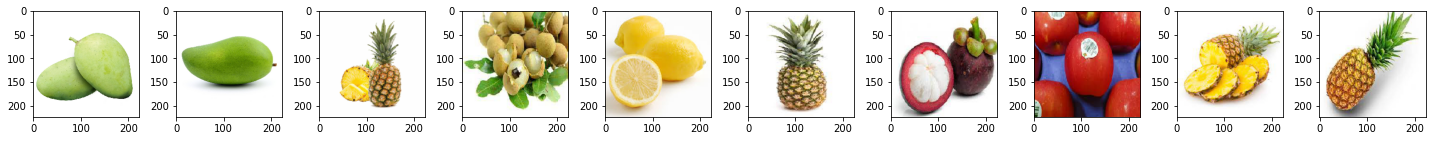

In [5]:
imgs, labels = next(test_batches)
fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()

for i, ax in zip( imgs, axes):
  ax.imshow(i)
plt.tight_layout()
plt.show()

In [6]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=10, activation='softmax') ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [9]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, steps_per_epoch=len(train_batches), 
                    validation_data=test_batches, epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3/3 [==============================] - 6s 2s/step - loss: 3.7599e-04 - accuracy: 1.0000 - val_loss: 45.0180 - val_accuracy: 0.2051
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 2.2746e-04 - accuracy: 1.0000 - val_loss: 53.7757 - val_accuracy: 0.2051
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 9.8690e-05 - accuracy: 1.0000 - val_loss: 62.1120 - val_accuracy: 0.2051
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 6.5564e-04 - accuracy: 1.0000 - val_loss: 74.1203 - val_accuracy: 0.2051
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 0.0920 - accuracy: 0.9565 - val_loss: 78.5596 - val_accuracy: 0.2051
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 4.1982e-07 - accuracy: 1.0000 - val_loss: 62.9979 - val_accuracy: 0.1795
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.2829 - accuracy: 0.9130 - val_loss: 60.4907 - val_accuracy: 0.2308
Epoch 8/10
3/3 [=========

In [10]:
model.save('Fruit.h5')

In [11]:
classify = load_model('Fruit.h5')
dic = train_batches.class_indices
dic

{'Apple': 0,
 'Banana': 1,
 'Chomchom': 2,
 'Grape': 3,
 'Lemon': 4,
 'Longan': 5,
 'Mangcut': 6,
 'Mango': 7,
 'Orange': 8,
 'Pineapple': 9}

Fruit Classification Result: ['Banana']


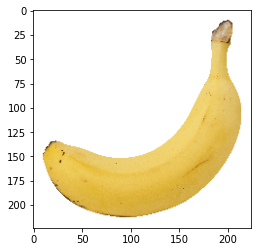

In [13]:
sample = load_img('/content/drive/MyDrive/Fruit/train/Banana/Banana-Single.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('Fruit Classification Result:', key)